# 훈련 세트와 테스트 세트

## 훈련 세트와 테스트 세트

머신러닝의 알고리즘을 제대로 평가하려면 훈련데이터와 테스트데이터가 달라야 한다.

In [1]:
# 도미와 빙어의 데이터를 합친 리스트

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
# 생선 길이와 무게를 짝지어 리스트로 만듦
fish_data = [[l,w] for l,w in zip(fish_length, fish_weight)]

# 정답지 만들기: 도미(1) 35마리, 빙어(0) 14마리
fish_target = [1]*35 + [0]*14

# 총 49개의 샘풀

In [8]:
# K-최근접이웃 알고리즘 클래스 임포트
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [9]:
train_input = fish_data[:35]      # 훈련 세트로 0 ~ 34까지
train_target = fish_target[:35]
test_input = fish_data[35:]       # 테스트 세트로 35 ~ 마지막까지
test_target = fish_target[35:]

# 단 여기에서는 생선 데이터 자체가 앞부분에 도미가 몰려있고 뒤에 빙어가 몰려있으므로
# 올바르게 훈련 세트와 테스트 세트를 나눈 것이 아니다.
# 훈련은 도미데이터로 하고 테스트는 빙어데이터로 하는 셈

In [10]:
kn = kn.fit(train_input, train_target)    # 훈련세트의 학습지와 정답지를 통해 훈련을 한다.
kn.score(test_input, test_target)         # 테스트세트의 학습지와 정답지를 통해 평가한다.

0.0

훈련세트와 테스트세트가 골고루 섞이지 않았으므로 당연히 정확도가 0%가 나오게 된다.  
따라서 샘플링편향이 일어나지 않도록 데이터를 골고루 섞어야 한다.  
이는 넘파이를 통해 처리할 수 있다.

## 넘파이

In [11]:
import numpy as np    # 넘파이 라이브러리 임포트

In [12]:
# 파이썬 리스트를 넘파이 배열로 바꾸어 준다.
# array() 함수 이용
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(fish_data)
print()
print(input_arr)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700

넘파이는 배열의 차원을 구분하기 쉽도록 행과 열을 가지런히 출력한다.

In [13]:
print(input_arr.shape)    # (샘플 수, 특성 수) 출력

(49, 2)


In [14]:
# 넘파이에서 무작위 결과를 만드는 함수를 실행하기 전에
# 일정한 결과를 얻기 위해 초기에 랜덤 시드(random seed)를 지정한다.

np.random.seed(42)
index = np.arange(49)    # 0에서 48까지 1씩 증가하는 배열 만듦(여기에선 인덱스 숫자를 뜻함)
np.random.shuffle(index) # 주어진 배열 무작위로 섞기

print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [15]:
# 인덱스 숫자를 무작위로 섞어 만든 index리스트에서 
# 35 이전까지의 무작위 인덱스에 해당하는 데이터를 훈련용 데이터로 지정한다.
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [16]:
# 따라서 그냥 input_arr의 인덱스 13에 해당하는 값과
# train_input의 인덱스 0에 해당하는 값을 같다.
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [17]:
# 나머지 14개를 테스트 데이터로 지정한다.
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

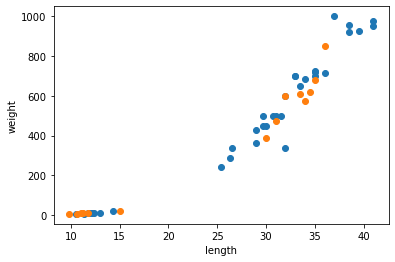

In [19]:
# 그래프 그리기
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])    # 훈련용 데이터의 생선길이와 생선무게를 x값, y값으로 지정하여 산점도 그리기
plt.scatter(test_input[:, 0], test_input[:, 1])     # 테스트용 데이터의 생선길이(x) 생선무게(y)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

파란색 - 훈련용세트  
주황색 - 테스트용세트  
  
데이터가 골고루 잘 섞여 있는 모습을 확인할 수 있다.

## 두 번째 머신러닝 프로그램

In [21]:
kn = kn.fit(train_input, train_target)    # 훈련용 데이터로 훈련시키기
kn.score(test_input, test_target)         # 테스트용 데이터로 평가하기

1.0

100%의 정확도이다.

In [22]:
# 테스트 세트의 예측 결과 확인
print(kn.predict(test_input))

# 실제 타깃 확인
print(test_target)

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


predict() 메서드에 테스트용 데이터를 집어 넣어 예측한 결과와  
실제 테스트용 데이터의 정답지가 같다는 것을 확인할 수 있다.  
100%의 정확도가 맞다.